# Create a 3D survey from 2D lines
In this notebook we will see how to use a set of 2D lines (regularly spaced or not) to create a full 3D survey (`Project.create3DSurvey()`). Note that you can also invert the 2D lines separately and view them in 3D (this latter is called 'pseudo3D', see separate notebook). In this example, the datasets of all lines are combined together in one single 3D survey.

In [1]:
import warnings # just to make it cleaner in the notebook
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder
testdir = '../src/examples/'
from resipy import Project

API path =  /media/jkl/data/phd/resipy/src/resipy
ResIPy version =  3.4.6
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


You can specify a lineSpacing if your lines are parallel, otherwise, custom electrodes location can be provided using `Project.importElec()`. In this case the 'label' column of the .csv should be formated 3D-like with `<lineNumber> <electrodeNumber>`. Each `<lineNumber>` corresponding to one 2D surveys.

If surveys have been imported based on a directory, the surveys are sorted by alphabetical order. Otherwise, you can provide a list of filenames to `Project.create3DSurvey()` and the order of the list will be respected.

In [2]:
# 3D survey from 2D perpendicular line with one common elec
# we are using the directory pseudo3d but it's not what we refer to as 'pseudo3D' project
# (see separate notebook for pseudo3D inversion)
k = Project(typ='R3t')
k.create3DSurvey(testdir + 'dc-2d-pseudo3d-synthetic/data', lineSpacing=1,
                 zigzag=False, name='mergedSurvey', ftype='ProtocolDC')
k.importElec(testdir + 'dc-2d-pseudo3d-synthetic/lines-elec.csv')
k.elec.head() # note the <lineNumber> <elecNumber> formatting of the 'label' column

Working directory is: /media/jkl/data/phd/resipy/src/resipy
clearing dirname
0/140 reciprocal measurements found.
0/140 reciprocal measurements found.
Merging electrodes positionned at the same location.


,label,x,y,z,remote,buried
0,1 1,-11.0,0.0,0.0,False,False
1,1 2,-10.0,0.0,0.0,False,False
2,1 3,-9.0,0.0,0.0,False,False
3,1 4,-8.0,0.0,0.0,False,False
4,1 5,-7.0,0.0,0.0,False,False


In [3]:
k.createMesh(cl=0.5)
k.invert()

Creating tetrahedral mesh...done (12338 elements)
Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


 >> R 3 t     E R T    M o d e l    v 2.31 <<

 >> Date: 03-12-2023
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat                                                                        

 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<

 >> Memory estimates:
    For   1000 measurements the memory needed is:          0.102 Gb
    For   2000 measurements the memory needed is:          0.201 Gb
    For   500

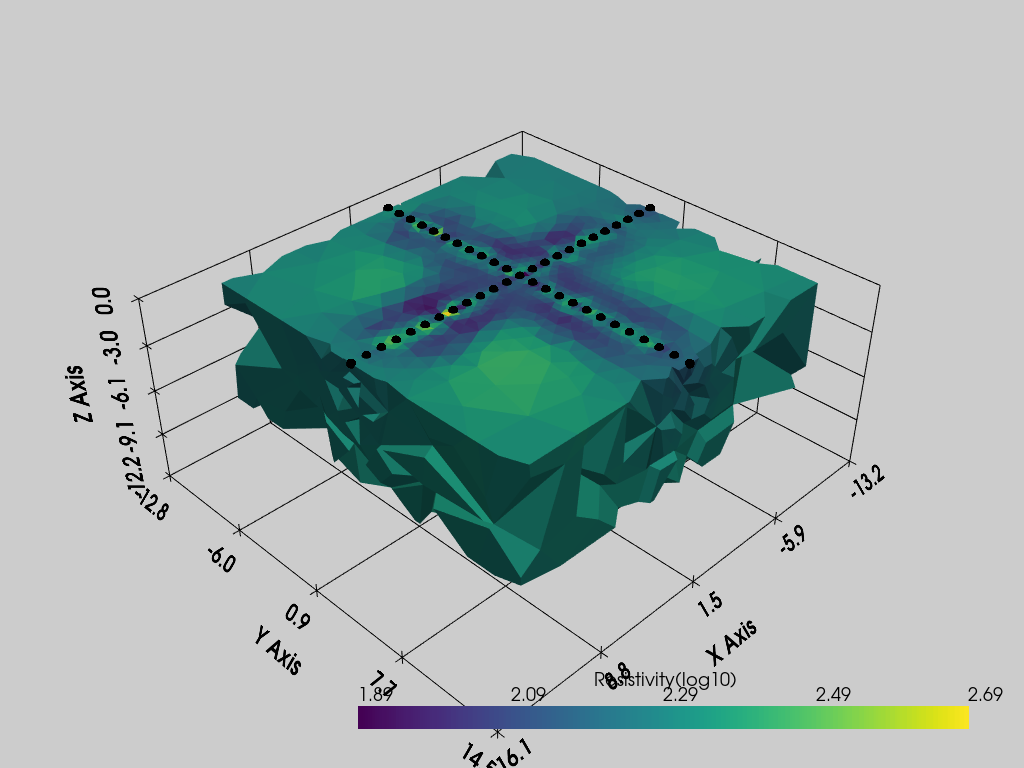

In [4]:
k.showResults()

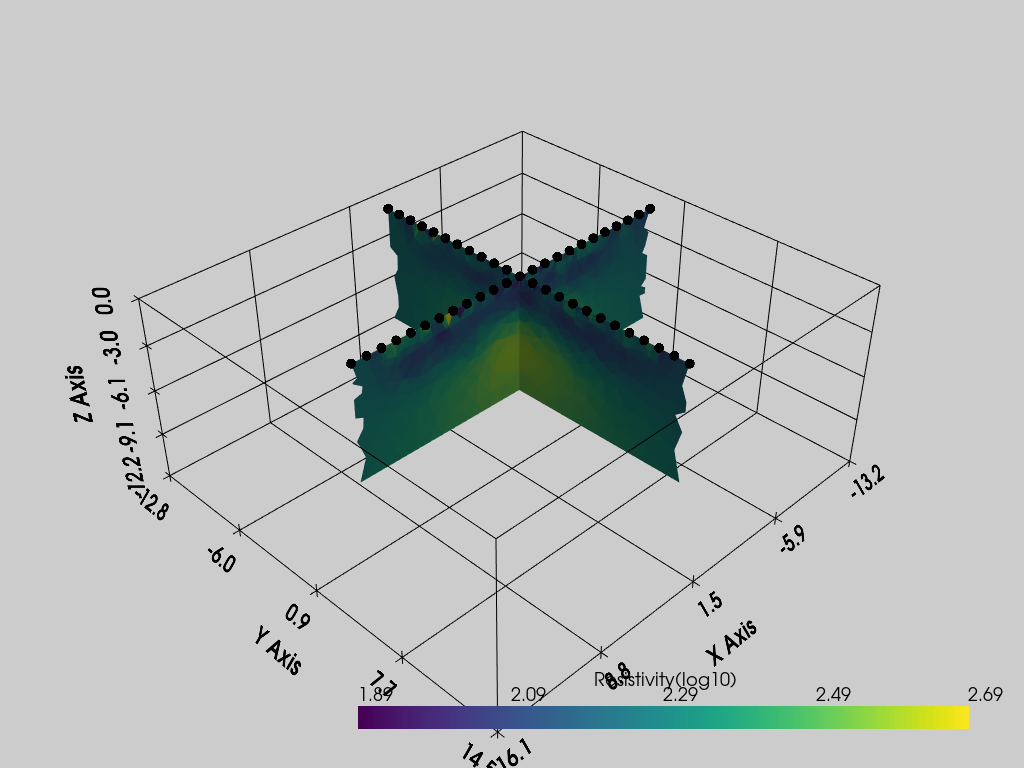

In [5]:
k.showResults(pvslices=[[0],[0],[]])